## Informations and Conventions
https://zrp.github.io/challenges/data-science/

For convention:
 * labels = 1 will be considered **POSITIVE** cases
 * labels = 0 will be considered **NEGATIVE** cases.

## Read dataset and brief analysis

### Packages

In [2]:
import pandas as pd
import plotly.express as plotly


### Functions

In [3]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/zrp/challenges/master/data-science/data.csv')
df_raw

,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9,start_timestamp,end_timestamp,inference
0,"[-0.29, -0.07]","[0.24, -0.62]","[-0.29, 0.14]","[0.1, 0.14]","[0.41, -0.45]","[0.41, 0.22]","[0.36, 0.03]","[0.37, 0.42]","[0.19, 0.42]","[0.19, 0.01]",1665656955,1665656967,1
1,"[-0.25, -0.04]","[0.04, 0.19]","[0.11, 0.19]","[-0.23, 0.07]","[-0.23, -0.38]","[-0.48, -0.37]","[-0.42, -0.33]","[-0.23, -0.33]","[-0.23, -0.2]","[-0.12, -0.31]",1665656968,1665656980,1
2,"[-0.59, -0.27]","[-0.42, -0.27]","[-0.42, -0.34]","[-0.35, -0.37]","[-0.39, -0.36]","[-0.47, -0.36]","[-0.12, -0.39]","[-0.12, -0.06]","[-0.01, -0.05]","[-0.11, 0.46]",1665656982,1665656994,1
3,"[-0.2, -0.15]","[-0.44, -0.31]","[-0.65, -0.31]","[-0.7, -0.17]","[-0.7, -0.15]","[-0.63, -0.12]","[-0.56, -0.13]","[-0.46, -0.13]","[-0.46, -0.18]","[-0.52, -0.15]",1665656914,1665656926,1
4,"[-0.35, -0.19]","[-0.61, -0.19]","[-0.61, -0.15]","[-0.61, -0.13]","[-0.59, -0.15]","[-0.56, -0.15]","[0.44, 0.27]","[0.44, 0.15]","[-0.59, -0.25]","[-0.56, -0.22]",1665656928,1665656940,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,"[0.08, -1.27]","[0.07, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.08, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.1, -1.27]","[0.08, -1.27]","[0.09, -1.27]",1674811711,1674811723,0
3511,"[0.02, -1.27]","[0.25, -1.27]","[0.18, -1.27]","[0.17, -1.27]","[0.19, -1.27]","[0.18, -1.27]","[0.18, -1.27]","[0.06, -1.14]","[-1.18, -0.71]","[-0.35, -1.27]",1674811725,1674811737,1
3512,"[-0.04, -1.27]","[0.03, -1.27]","[0.02, -1.27]","[0.02, -1.27]","[0, -1.27]","[0.02, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[-0.8, -1.07]",1674811654,1674811667,1
3513,"[-0.09, -1.18]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]",1674811669,1674811681,1


### Balancement of dataset

In [4]:
df_raw['inference'].value_counts()

1    1989
0    1526
Name: inference, dtype: int64

**Notes:** The dataset is relatively balanced, with more positive than negative samples. Therefore, it is expected that the machine learning model will be better at classifying positive samples than negative ones.

### Max and min of t_start and t_end
I want to see the interval os values for each read of dataset.
To do that, the use of explode function is needed to put every value in a cell
Then, we can use the min and max functions to see the interval of values for each read



In [5]:
print('Value:',df_raw.iloc[0]['read0'],'\n','Type:',type(df_raw.iloc[0]['read0']))

Value: [-0.29, -0.07] 
 Type: <class 'str'>


But, because, as contested above, all the cells of dataset is of type string, we need to convert it to a list of floats

In [6]:
from ast import literal_eval

df_float_list = df_raw.iloc[:, :10]
for name, column in df_float_list.iteritems():
    column = column.apply(literal_eval)
    df_float_list[name] = column
df_float_list

C:\Users\guimi\AppData\Local\Temp\ipykernel_9848\269520465.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_float_list.iteritems():


,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9
0,"[-0.29, -0.07]","[0.24, -0.62]","[-0.29, 0.14]","[0.1, 0.14]","[0.41, -0.45]","[0.41, 0.22]","[0.36, 0.03]","[0.37, 0.42]","[0.19, 0.42]","[0.19, 0.01]"
1,"[-0.25, -0.04]","[0.04, 0.19]","[0.11, 0.19]","[-0.23, 0.07]","[-0.23, -0.38]","[-0.48, -0.37]","[-0.42, -0.33]","[-0.23, -0.33]","[-0.23, -0.2]","[-0.12, -0.31]"
2,"[-0.59, -0.27]","[-0.42, -0.27]","[-0.42, -0.34]","[-0.35, -0.37]","[-0.39, -0.36]","[-0.47, -0.36]","[-0.12, -0.39]","[-0.12, -0.06]","[-0.01, -0.05]","[-0.11, 0.46]"
3,"[-0.2, -0.15]","[-0.44, -0.31]","[-0.65, -0.31]","[-0.7, -0.17]","[-0.7, -0.15]","[-0.63, -0.12]","[-0.56, -0.13]","[-0.46, -0.13]","[-0.46, -0.18]","[-0.52, -0.15]"
4,"[-0.35, -0.19]","[-0.61, -0.19]","[-0.61, -0.15]","[-0.61, -0.13]","[-0.59, -0.15]","[-0.56, -0.15]","[0.44, 0.27]","[0.44, 0.15]","[-0.59, -0.25]","[-0.56, -0.22]"
...,...,...,...,...,...,...,...,...,...,...
3510,"[0.08, -1.27]","[0.07, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.08, -1.27]","[0.07, -1.27]","[0.08, -1.27]","[0.1, -1.27]","[0.08, -1.27]","[0.09, -1.27]"
3511,"[0.02, -1.27]","[0.25, -1.27]","[0.18, -1.27]","[0.17, -1.27]","[0.19, -1.27]","[0.18, -1.27]","[0.18, -1.27]","[0.06, -1.14]","[-1.18, -0.71]","[-0.35, -1.27]"
3512,"[-0.04, -1.27]","[0.03, -1.27]","[0.02, -1.27]","[0.02, -1.27]","[0, -1.27]","[0.02, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[0.01, -1.27]","[-0.8, -1.07]"
3513,"[-0.09, -1.18]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.14, -1.27]","[0.16, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]","[0.15, -1.27]"


In [7]:
print(f"Value: {df_float_list.iloc[0]['read0']} \n"
      f"Type: {type(df_float_list.iloc[0]['read0'])} \n"
      f"\n"
      f"Element value: {df_float_list.iloc[0]['read0'][0]} \n"
      f"Element type: {type(df_float_list.iloc[0]['read0'][0])}")
#
# print('Value:',df_float_list.iloc[0]['read0'],'\n','Type:',type(df_float_list.iloc[0]['read0']), '\n','Element type:',type(df_float_list.iloc[0]['read0'][0]))

Value: [-0.29, -0.07] 
Type: <class 'list'> 

Element value: -0.29 
Element type: <class 'float'>


Now, that all types are correct, we need to explode so that only one value is in each cell

In [8]:
df_exploded = df_float_list.apply(pd.Series.explode)
df_exploded

,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9
0,-0.29,0.24,-0.29,0.1,0.41,0.41,0.36,0.37,0.19,0.19
0,-0.07,-0.62,0.14,0.14,-0.45,0.22,0.03,0.42,0.42,0.01
1,-0.25,0.04,0.11,-0.23,-0.23,-0.48,-0.42,-0.23,-0.23,-0.12
1,-0.04,0.19,0.19,0.07,-0.38,-0.37,-0.33,-0.33,-0.2,-0.31
2,-0.59,-0.42,-0.42,-0.35,-0.39,-0.47,-0.12,-0.12,-0.01,-0.11
...,...,...,...,...,...,...,...,...,...,...
3512,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.07
3513,-0.09,0.14,0.16,0.15,0.14,0.16,0.15,0.15,0.15,0.15
3513,-1.18,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27,-1.27
3514,0.15,0.15,0.14,0.15,0.14,0.13,0.1,0.09,0.07,0.04


Finally, we can get the min and max value for each read

In [12]:
# indices pares são t_start
# indices impares são t_end
# Series

df_min_max = pd.DataFrame(index=['min','max'])
for name, column in df_exploded.iteritems():
    min_max = pd.Series([column.min(), column.max()], index=['min', 'max'])
    df_min_max[name] = min_max

df_min_max

C:\Users\guimi\AppData\Local\Temp\ipykernel_9848\753292604.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_exploded.iteritems():
C:\Program Files\JetBrains\PyCharm 2022.2.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:605: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s = s[:max_items]
C:\Program Files\JetBrains\PyCharm 2022.2.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:606: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in s.iteritems():
C:\Program Files\JetBrains\PyCharm 2022.2.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:605: FutureWarn

KeyboardInterrupt: 

**Notes:**  all columns has the same min and max values for t_start and t_end


## Prepare dataset for model

### Packages

In [30]:
import plotly.express as px
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix


### Functions

### Create diff_read columnsand diff_timestamp

,diff_read0,diff_read1,diff_read2,diff_read3,diff_read4,diff_read5,diff_read6,diff_read7,diff_read8,diff_read9,mean,inference
0,0.22,-0.86,0.43,0.04,-0.86,-0.19,-0.33,0.05,0.23,-0.18,-0.145,1
1,0.21,0.15,0.08,0.30,-0.15,0.11,0.09,-0.10,0.03,-0.19,0.053,1
2,0.32,0.15,0.08,-0.02,0.03,0.11,-0.27,0.06,-0.04,0.57,0.099,1
3,0.05,0.13,0.34,0.53,0.55,0.51,0.43,0.33,0.28,0.37,0.352,1
4,0.16,0.42,0.46,0.48,0.44,0.41,-0.17,-0.29,0.34,0.34,0.259,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3510,-1.35,-1.34,-1.34,-1.35,-1.35,-1.34,-1.35,-1.37,-1.35,-1.36,-1.350,0
3511,-1.29,-1.52,-1.45,-1.44,-1.46,-1.45,-1.45,-1.20,0.47,-0.92,-1.171,1
3512,-1.23,-1.30,-1.29,-1.29,-1.27,-1.29,-1.28,-1.28,-1.28,-0.27,-1.178,1
3513,-1.09,-1.41,-1.43,-1.42,-1.41,-1.43,-1.42,-1.42,-1.42,-1.42,-1.387,1


,diff_read0,diff_read1,diff_read2,diff_read3,diff_read4,diff_read5,diff_read6,diff_read7,diff_read8,diff_read9,mean,inference
diff_read0,1.000000,0.917644,0.872440,0.855966,0.836976,0.824151,0.813706,0.804010,0.796493,0.787236,0.913234,0.031193
diff_read1,0.917644,1.000000,0.922247,0.886505,0.863278,0.844768,0.827646,0.813382,0.804464,0.791169,0.930679,0.026320
diff_read2,0.872440,0.922247,1.000000,0.929231,0.890291,0.861300,0.834520,0.819223,0.813770,0.802877,0.938608,0.023438
diff_read3,0.855966,0.886505,0.929231,1.000000,0.929145,0.882536,0.848479,0.822619,0.818110,0.806681,0.942107,0.027084
diff_read4,0.836976,0.863278,0.890291,0.929145,1.000000,0.922794,0.870115,0.840530,0.830671,0.814913,0.944102,0.025867
diff_read5,0.824151,0.844768,0.861300,0.882536,0.922794,1.000000,0.918140,0.868751,0.847472,0.826521,0.943732,0.029557
diff_read6,0.813706,0.827646,0.834520,0.848479,0.870115,0.918140,1.000000,0.918069,0.880896,0.851921,0.940123,0.023579
diff_read7,0.804010,0.813382,0.819223,0.822619,0.840530,0.868751,0.918069,1.000000,0.921745,0.875090,0.931550,0.012478
diff_read8,0.796493,0.804464,0.813770,0.818110,0.830671,0.847472,0.880896,0.921745,1.000000,0.918550,0.926098,0.012139
diff_read9,0.787236,0.791169,0.802877,0.806681,0.814913,0.826521,0.851921,0.875090,0.918550,1.000000,0.909316,0.016901


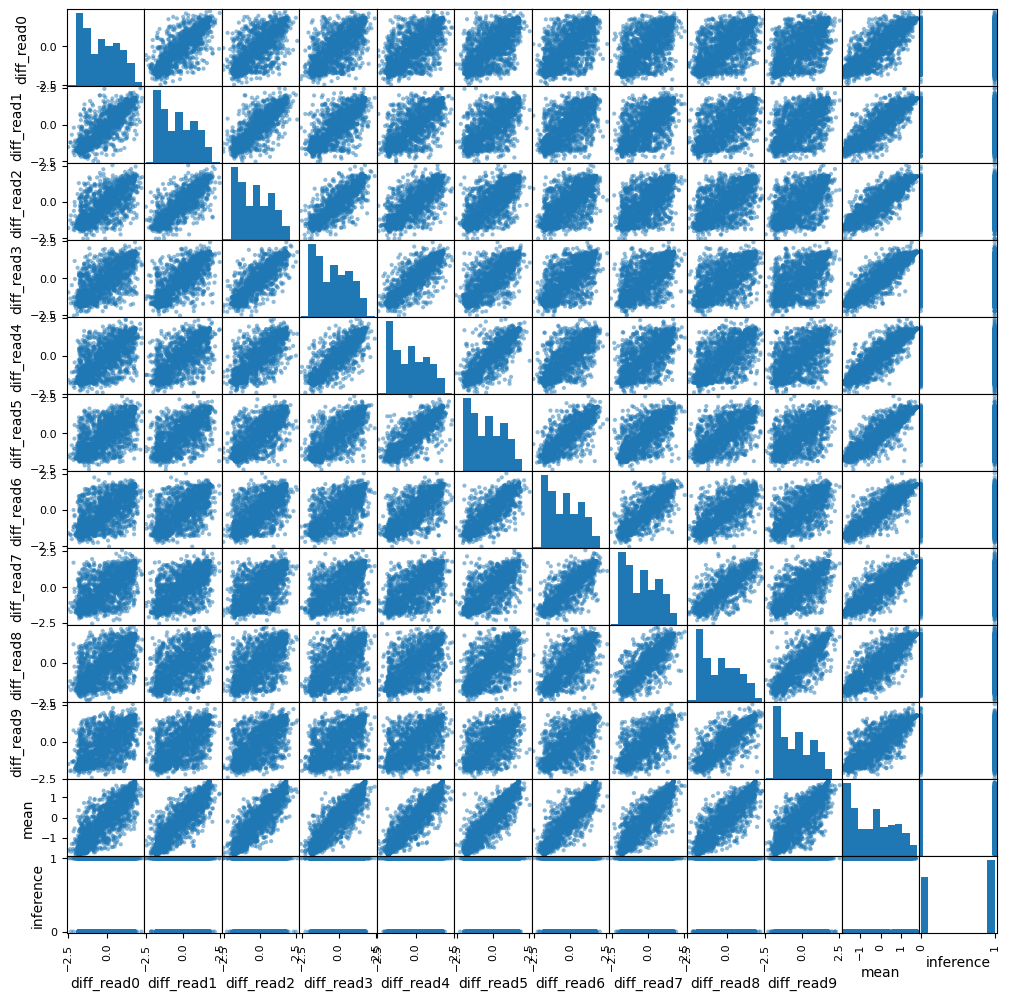

In [34]:
### Transform each cell to difference between t_end and t_start
df_for_model = df_float_list.copy()

df_for_model = df_for_model.apply(lambda x: x.apply(lambda y: y[1] - y[0]))
df_for_model['mean'] = df_for_model.iloc[:, :10].mean(axis=1)
# change column names: read0 -> diff_read0
df_for_model.columns = df_for_model.columns.str.replace('read', 'diff_read')
df_for_model['start_timestamp'] = df_raw['start_timestamp']
df_for_model['end_timestamp'] = df_raw['end_timestamp']
df_for_model['diff_timestemp'] = df_for_model['end_timestamp'] - df_for_model['start_timestamp']
df_for_model['inference'] = df_raw['inference']

df_for_model = df_for_model.drop(columns=['start_timestamp', 'end_timestamp', 'diff_timestemp'],axis = 1)

display(df_for_model)
display(df_for_model.corr())
scatter_matrix(df_for_model, figsize=(12, 12))
plt.show()


In [11]:
df_for_model.describe()

,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9,start_timestamp,end_timestamp,diff_timestemp,inference
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3.515000e+03,3.515000e+03,3515.000000,3515.000000
mean,-0.372094,-0.381730,-0.382080,-0.376802,-0.378740,-0.381991,-0.387616,-0.393690,-0.396145,-0.384145,1.673222e+09,1.673222e+09,13.613940,0.565861
std,1.095295,1.098447,1.091348,1.089278,1.089104,1.083605,1.081430,1.084347,1.085432,1.092192,2.356191e+06,2.356191e+06,1.014286,0.495714
min,-2.480000,-2.510000,-2.550000,-2.550000,-2.440000,-2.550000,-2.550000,-2.550000,-2.390000,-2.430000,1.665657e+09,1.665657e+09,12.000000,0.000000
25%,-1.430000,-1.450000,-1.430000,-1.440000,-1.445000,-1.440000,-1.430000,-1.450000,-1.440000,-1.440000,1.673362e+09,1.673362e+09,13.000000,0.000000
50%,-0.410000,-0.430000,-0.430000,-0.420000,-0.410000,-0.420000,-0.420000,-0.430000,-0.440000,-0.420000,1.674051e+09,1.674051e+09,13.000000,1.000000
75%,0.620000,0.620000,0.610000,0.620000,0.600000,0.610000,0.590000,0.590000,0.565000,0.610000,1.674225e+09,1.674225e+09,14.000000,1.000000
max,2.250000,2.460000,2.550000,2.430000,2.400000,2.550000,2.550000,2.550000,2.220000,2.550000,1.674812e+09,1.674812e+09,29.000000,1.000000


array([[<AxesSubplot: xlabel='diff_read0', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read1', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read2', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read3', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read4', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read5', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read6', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read7', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read8', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_read9', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='mean', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='diff_timestemp', ylabel='diff_read0'>,
        <AxesSubplot: xlabel='inference', ylabel='diff_read0'>],
       [<AxesSubplot: xlabel='diff_read0', ylabel='diff_read1'>,
        <AxesSubplot: xlabel='diff_read1', ylabel='diff_read1'>,
        <AxesSubplot: xlabe

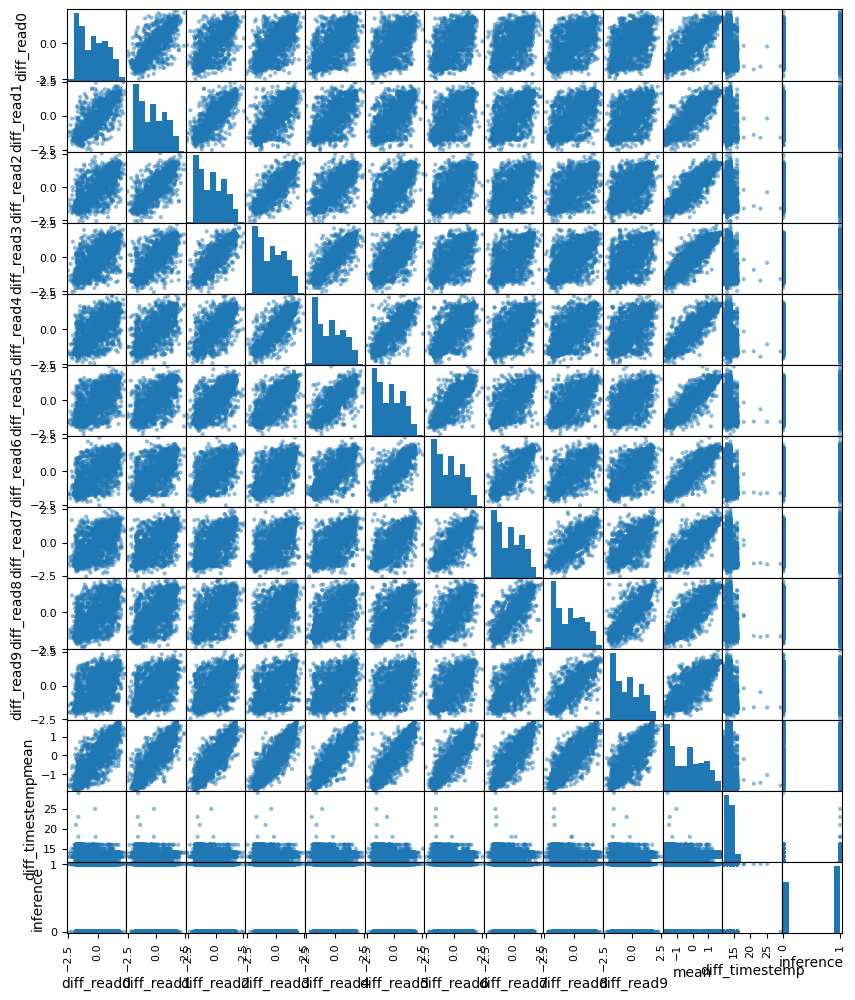

In [31]:
# data from europe px line

